# Анализ рынка компьютерных игр

# Содержание
[**Загрузка данных.**](#Загрузка-данных)

[**Предобработка данных.**](#Предобработка-данных)

[**Исследовательский анализ данных.**](#Исследовательский-анализ-данных)

[**Составление портрета пользователя каждого региона.**](#Составление-портрета-пользователя-каждого-региона)

[**Проверка гипотез.**](#Проверка-гипотез)

[**Общий вывод.**](#Общий-вывод)

# Описание проекта
<br> **Интернет-магазине «Стримчик»**
<br>  Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 
<br>***Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.***
<br> 
<br>В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Описание данных
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

# Импортирование библиотек

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import seaborn as sb

## Загрузка данных

### Откроем файл games.csv и изучим его

In [140]:
data = pd.read_csv('/datasets/games.csv')

display(data.head(20))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


**Также, выведем общую информацию о датафрейме.**

In [141]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


### Промежуточный вывод по изученным данным

**По изученным данным можно заметить, что в датафрейме:**
1. имеются пропуски;
2. названия столбцов имеют верхний регистр;
3. возможно присутствуют дубликаты.;
4. в некоторых столбцах нужно поменять тип данных.
<br>
**Столбцы в которых нужно поменять тип данных:**
* Тип данных в столбце Year_of_Release надо заменить на int64 (так как год может быть представлен только в виде целочисленного значения).
* Тип данных в столбце User_Score надо заменить на float (так как рейтинг представлен в виде нецелочисленного значения).

## Предобработка данных

### Заменим названия столбцов

In [142]:
data.columns = data.columns.str.lower() # используем метод str.lower() для приведения к нижнему регистру 

print(data.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


### Преобразование данных в нужные типы. Обработка пропусков.

**Столбец 'name'**
<br>
<br> *Посмотрим на пропуски в столбце*

In [143]:
display(data[data['name'].isnull()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


*В двух строках в столбце name отсутствуют имена. Возможно их не указали при заполнении данных. Эти строки придётся удалить.*

In [144]:
data.dropna(subset = ['name'], inplace = True)

print(data['name'].isnull().sum()) # вывод для того, чтобы проверить, что пропуски удалены

0


**Столбец 'year_of_release'**
<br>
<br>*Некоторые пропуски в данном столбце, мы можем заполнить исходя из того, что игры выпущенные на разных платформах, выпускались в один год.*

In [145]:
print('Количество пропусков в столбе "год релиза" =', data['year_of_release'].isna().sum())

Количество пропусков в столбе "год релиза" = 269


In [146]:
data['year_of_release'] = data['year_of_release'].fillna(data.groupby('name')['year_of_release'].transform('median'))
data = data.dropna(subset=['year_of_release'])

In [147]:
print('Количество пропусков в столбе "год релиза" после обработки =', data['year_of_release'].isna().sum())

Количество пропусков в столбе "год релиза" после обработки = 0


*Преобразуем тип данных*

In [148]:
data['year_of_release'] = data['year_of_release'].astype('int')

*Вывод для проверки изменённого типа данных*

In [149]:
print(data['year_of_release'].head())

0    2006
1    1985
2    2008
3    2009
4    1996
Name: year_of_release, dtype: int64


**Столбец 'critic_score'**
<br>
<br>*Показатель типа рейтинг - порядковая переменная, поэтому пропущенные значения в ячейке "оценка критиков" заменим на -1 (группа для пропущенных значений)*
<br>
<br>*Значения могли быть пропущенны по каким-либо техническим причинам или игра просто не оценивалась (игра выпускалась только для внутреннего рынка, не популярный жанр, определенная возрастная аудитория)*

In [150]:
print('Количество пропусков в столбе "оценка критиков" =', data['critic_score'].isna().sum())

Количество пропусков в столбе "оценка критиков" = 8492


In [151]:
data['critic_score'] = data['critic_score'].fillna(-1) # использование метода fillna() для заполнения пропусков значением -1

In [152]:
print(' Количество пропусков в столбе "оценка критиков" после обработки - ', data['critic_score'].isna().sum())

 Количество пропусков в столбе "оценка критиков" после обработки -  0


*Преобразуем тип данных*

In [153]:
data['critic_score'] = data['critic_score'].astype('int')

*Вывод для проверки изменённого типа данных*

In [154]:
print(data['critic_score'].head())

0    76
1    -1
2    82
3    80
4    -1
Name: critic_score, dtype: int64


**Столбец 'user_score'**
<br>
<br>*Показатель типа рейтинг - порядковая переменная, поэтому пропущенные значения в ячейке "оценка критиков" заменим на -1 (группа для пропущенных значений).*
<br>
<br>*Значения могли быть пропущенны по каким-либо техническим причинам или игра просто не оценивалась (игра выпускалась только для внутреннего рынка, не популярный жанр, определенная возрастная аудитория).*

Для начала посмотрим на уникальные значения столбца.

In [155]:
display(data['user_score'].unique())

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

**Можем заметить, что в данном столбце присутствует аббревиатура 'tbd', которая расшифровывается как 'to be determined' и означает 'подлежит обсуждению', то есть значит,что оценка не определена.**
<br>
**Заменим абривиатуру на NaN.**

In [156]:
data['user_score'] = data['user_score'].replace('tbd', np.nan)

In [157]:
print('Количество пропусков в столбе "оценка игроков" =', data['user_score'].isnull().sum())

Количество пропусков в столбе "оценка игроков" = 9027


In [158]:
data['user_score'] = data['user_score'].fillna(-1.0)

In [159]:
print('Количество пропусков в столбе "оценка игроков" после обработки =', data['user_score'].isnull().sum())

Количество пропусков в столбе "оценка игроков" после обработки = 0


*Преобразуем тип данных*

In [160]:
data['user_score'] = data['user_score'].astype('float')

*Вывод для проверки изменённого типа данных*

In [161]:
print(data['user_score'].head())

0    8.0
1   -1.0
2    8.3
3    8.0
4   -1.0
Name: user_score, dtype: float64


**Столбец 'rating'**
<br>
<br>*Заполним пропущенные значения аббревиатурой "NR", которая расшифровывается, как "Not rated"*
<br>
<br>*Значения могли быть пропущенны по каким-либо техническим причинам или игра просто не оценивалась (игра выпускалась только для внутреннего рынка, не популярный жанр, определенная возрастная аудитория).*

In [162]:
print('Количество пропусков в столбце "возрастной рейтинг" =', data['rating'].isnull().sum())

Количество пропусков в столбце "возрастной рейтинг" = 6699


In [163]:
data['rating'] = data['rating'].fillna('NR')

In [164]:
print('Количество пропусков в столбце "возрастной рейтинг" после обработки =', data['rating'].isnull().sum())

Количество пропусков в столбце "возрастной рейтинг" после обработки = 0


### Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец.

In [165]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [166]:
display(data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,NR,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,NR,31.38


### Проверим данные на наличие дубликатов.

**Явные дубликаты**

In [167]:
print(data.duplicated().sum())

0


**Явные дубликаты отсутствуют. Проверим наличие неявных дубликатов**

In [168]:
display(data[data.duplicated(subset = ['name', 'platform'])])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.0,0.13,0.02,0.10,83,8.5,T,1.25
4127,Sonic the Hedgehog,PS3,2006,Platform,0.0,0.48,0.00,0.00,43,4.1,E10+,0.48
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.0,0.06,0.00,0.02,82,8.5,T,0.08
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.00,0.00,83,5.5,E,0.01


**Можем заметить, что у нас есть 4 игры, которые являются дубликатами. Проверим, так ли это.**

**Игра - Need for Speed: Most Wanted. Платформа - X360.**

In [169]:
display(data.query('name == "Need for Speed: Most Wanted" & platform == "X360"'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83,8.5,T,1.56
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83,8.5,T,1.25


**Игра - Sonic the Hedgehog. Платформа - PS3.**

In [170]:
display(data.query('name == "Sonic the Hedgehog" & platform == "PS3"'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1745,Sonic the Hedgehog,PS3,2006,Platform,0.41,0.06,0.04,0.66,43,4.1,E10+,1.17
4127,Sonic the Hedgehog,PS3,2006,Platform,0.00,0.48,0.00,0.00,43,4.1,E10+,0.48


**Игра - Need for Speed: Most Wanted. Платформа - PC.**

In [171]:
display(data.query('name == "Need for Speed: Most Wanted" & platform == "PC"'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.0,0.04,82,8.5,T,0.29
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.0,0.02,82,8.5,T,0.08


**Игра - Madden NFL 13. Платформа - PS3	.**

In [172]:
display(data.query('name == "Madden NFL 13" & platform == "PS3"'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83,5.5,E,2.56
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83,5.5,E,0.01


**Для игры "Need for Speed: Most Wanted" существует два издания: одно - 2005 года, другое 2012 и называются они совершенно одинаково, но это две разные игры (эта информация есть в интернете). А вот игры: "Sonic the Hedgehog" и "Madden NFL 13" имеют две строчки дубликатов, от которых нужно избавиться.**

In [173]:
data = data.drop(index = [4127, 16230])
data.reset_index(drop= True , inplace= True )

display(data[data.duplicated(subset = ['name', 'platform'])])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1582,Need for Speed: Most Wanted,X360,2005,Racing,1.0,0.13,0.02,0.10,83,8.5,T,1.25
11623,Need for Speed: Most Wanted,PC,2012,Racing,0.0,0.06,0.00,0.02,82,8.5,T,0.08


**Таким образом мы избавились от дубликатов для пары "Имя - Игровая консоль".**

### Промежуточный вывод по предобработке данных
<br> **На данном этапе:**
* В столбце 'name' удалено 2 пропуска ввиду невозможности их восстановления и малого количества;
* В столбце 'year_of_release' было обнаружено 269 пропущенных записей (1.6% от общего числа записей). Некоторые пропуски в данном столбце были заполнены годом, взятым по имени той же игры, только на другой игровой платформе. Оставшиеся пропуски были удалены. Также, тип данных в столбце был изменён на int для более удобной работы с данными.
* В столбцах 'critic_score' и 'user_score' было обнаружено 8492 (50.80% от общего числа записей) и 9032 (54% от общего числа записей) пропусков, соответственно. Оценки критиков и пользователей были выгружены с веб-сайта Metacritic и вот несколько причин, почему большое количество данных отсутствует:
    1. В столбце 'user_score' присутствовали значения "tbd", которые расшифровываются как "to be determined". Для игр с такой оценкой не хватает пользовательских оценок, чтобы по правилам Metacritic установить рейтинг. Данные значения, были заменены на -1;
    2. На Metacritic отсутсвуют игровые платформы, которые были распространены до 2000 года, поэтому данных по этим играм нет;
    3. На Metacritic имеются не все игры, выпускаемые в мире, поэтому для них также нет оценок
* В столбце 'rating' было обнаружено 6699 пропусков (40.08% от общего числа записей). Пропущенные значения были заполнены аббревиатурой "NR".
* Также, были посчитаны суммарные продажи во всех регионах для каждой игры. Данные о суммарных продажах записаны в отдельный столбец под названием 'total_sales'.
* В конце предобработки данных разобрались с дубликатами. Явных дубликатов не нашлось, а вот неявные, для игр: "Sonic the Hedgehog" и "Madden NFL 13", две строчки дубликатов, были удалены.

## Исследовательский анализ данных

### Посмотрим, сколько игр выпускалось в разные годы.

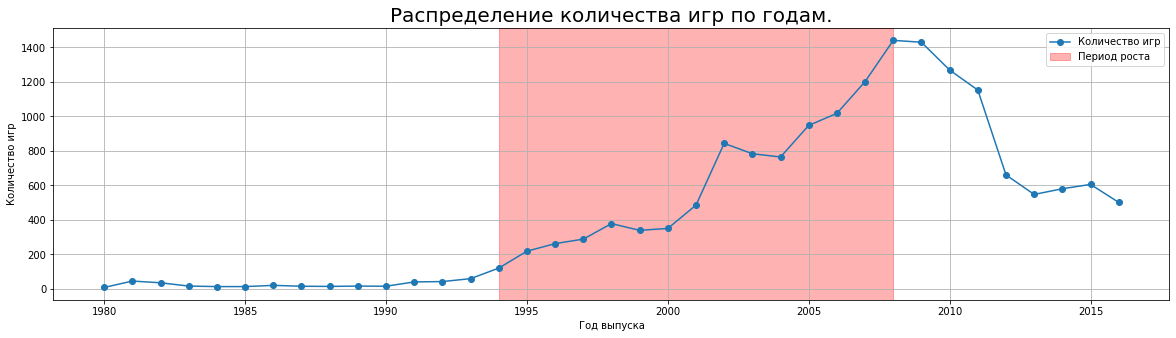

In [174]:
plt.figure(figsize=(20, 5))
plt.title('Распределение количества игр по годам.', fontsize=20)
plt.ylabel('Количество игр')
plt.xlabel('Год выпуска')
plt.plot(data.groupby('year_of_release')['name'].count(), 'o-', label='Количество игр', alpha=1)
plt.axvspan(1994, 2008, color='red', label='Период роста', alpha = 0.3)
plt.grid(True)
plt.legend();

**На данном графике можем увидеть, что рост количества выпускаемых игр идёт с 1994 года по 2008 год. До 1994 года количество игр оставалось на одном уровне. После 2008 года можем заметить, что идёт спад.**
<br>
<br> **В 1994 году начался активный рост, как мы видим по графику. Это произошло из-за того, что 1994 стал великим годом в становлении видеоигровой 3D графики. 1994 был годом, когда домашние игровые системы стали достаточно мощными, чтобы двигать прогресс игрового 3D. Помимо этого, в этом же году были выпущены первое поколение консолей, способных рендерить 3D: Nintendo 64 и Playstation.**
<br>
<br>**Экономический кризис 2008 года повлиял на современные игры и, в целом, на игровую индустрию. Большое количество работников было уволено, многие компании были закрыты из-за отсутствия финансирования. Помимо этого, игры стали выходить на новый уровень и сделать игру становиться всё более сложным и долгим процессом, в котором должна участвовать большая команда. Именно эти факторы влияют на то, что игр становиться меньше, по сравнению с тем количеством, которое было в 2000-х годах.**

### Посмотрим, как менялись продажи по платформам.

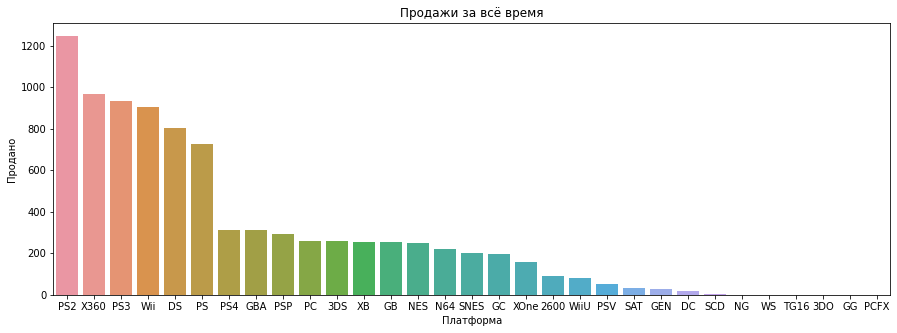

In [175]:
sales = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False)

plt.figure(figsize=(15,5))
sb.barplot(x=sales.index,y=sales['total_sales'])
plt.title("Продажи за всё время")
plt.xlabel("Платформа")
plt.ylabel("Продано")
plt.show()

**Наиболее популярные платформы:**
* PS2 - лидер по продажам (за всё время);
* X360
* PS3
* Wii
* DS
* PS

**Построим распределение по годам для 6 наиболее популярных платформ.**
**Для этого:**
1. Создадим датафрейм, хранящий в себе название платформы и суммарное количество проданных игр для консоли.
2. В этом датафрейме выделим 6 лидирующих по продажам платформ и создадим список из их названий.
3. Построим график распределения 

In [176]:
sales_by_platform = data.groupby('platform')['total_sales'].sum()

print(sales_by_platform.head())

platform
2600     89.01
3DO       0.10
3DS     258.53
DC       15.95
DS      804.28
Name: total_sales, dtype: float64


In [177]:
leaders = list(sales_by_platform[sales_by_platform > 600].index)
display(leaders)

['DS', 'PS', 'PS2', 'PS3', 'Wii', 'X360']

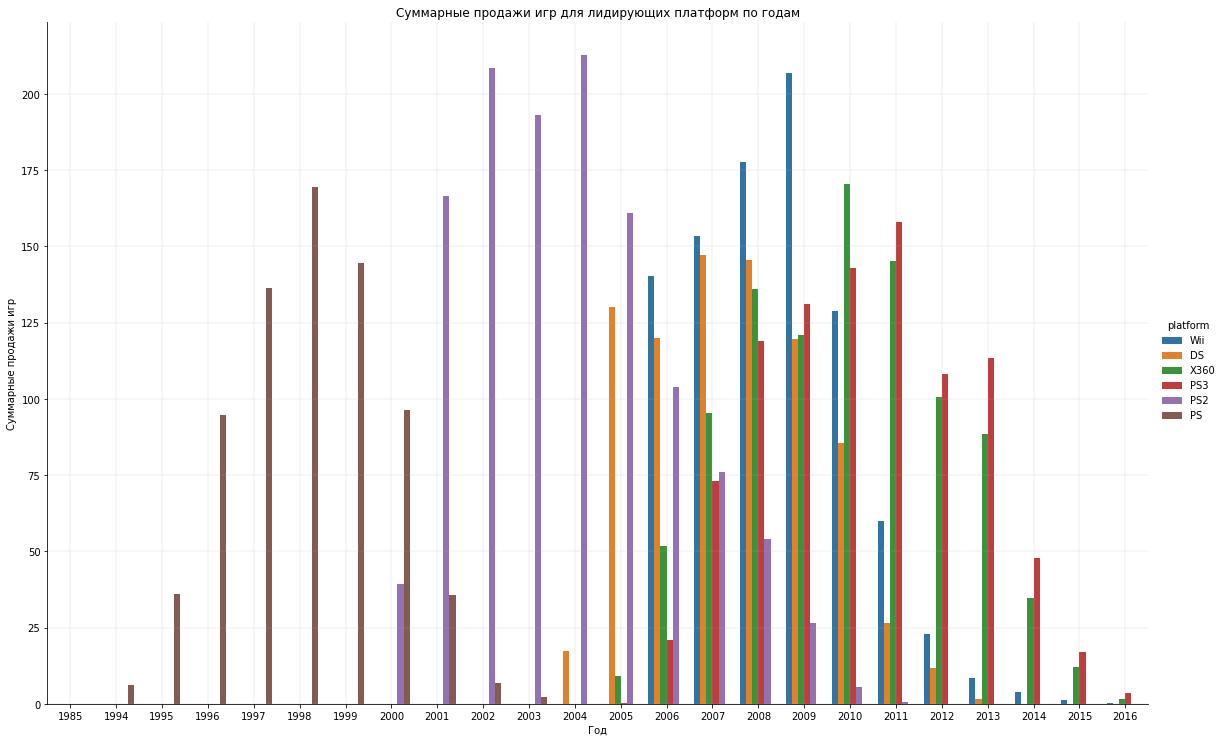

In [178]:
sb.catplot(
    kind='bar',
    data=data.query('platform in @leaders'),
    x='year_of_release',
    y='total_sales',
    hue='platform',
    height=10,
    aspect=1.6,
    ci=None,
    estimator=sum);
plt.xlabel('Год')
plt.ylabel('Суммарные продажи игр')
plt.grid(linewidth=0.2)
plt.title('Суммарные продажи игр для лидирующих платформ по годам')
plt.show()

**На графике можем заметить аномалию в 1985 году. Проверим, что с ней можно сделать.**
<br>
<br> **Также, по графику можно понять, что средний срок, за который появляются новые и исчезают старые платформы, 11 лет.**

In [179]:
display(data.query('platform in @leaders and year_of_release == 1985'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15817,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,-1,-1.0,NR,0.02


**Поискав информацию об игре в интернете, можно узнать, что игра вышла в 2007 году. Исправим это.**

In [180]:
data.loc[data['name'] == 'Strongest Tokyo University Shogi DS', 'year_of_release'] = 2007

display(data.query('platform in @leaders and year_of_release == 1985')) # вывод чтобы убедиться, что избавились от аномалии

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


### Актуальный период для составления прогноза на 2017 год.

Лучше всего будет взять данные, начиная с того момента, когда они стабилизировались (2012 г.). Значит, для составления прогноза на 2017 год, нужно выделить данные, начинающиеся **с 2012 года.**

In [181]:
actual_data = data.query('year_of_release>=2012')

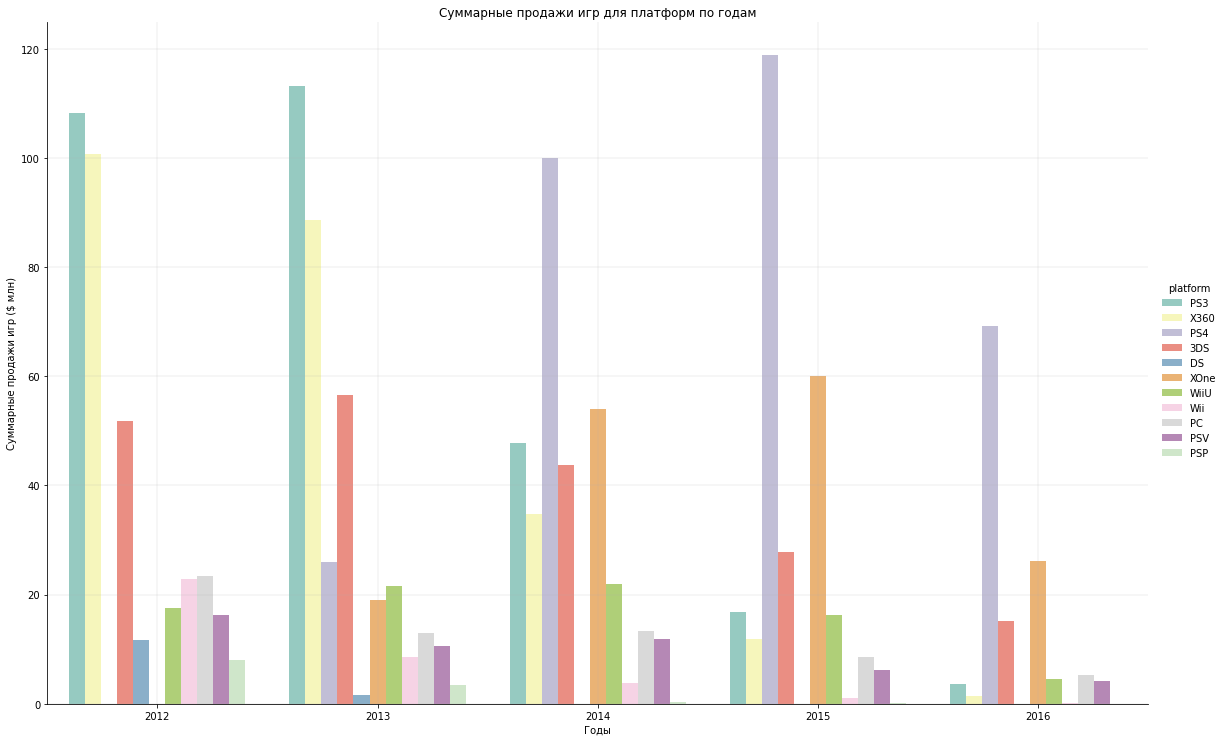

In [182]:
sb.catplot(
    kind='bar',
    data=actual_data,
    x='year_of_release',
    y='total_sales',
    hue='platform',
    height=10,
    aspect=1.6,
    ci=None,
    estimator=sum,
    palette='Set3');
plt.xlabel('Годы')
plt.ylabel('Суммарные продажи игр ($ млн)')
plt.grid(linewidth=0.2)
plt.title('Суммарные продажи игр для платформ по годам')
plt.show()

**Платформы за актуальный период:**
1. PS4 - один из лидеров по продажам;
2. XONE - один из лидеров по продажам;
3. X360 - продажи падают;
4. PS3 - продажи падают;
5. 3DS - продажи падают;
6. Wii - продажи закончены;
7. WiiU - продажи падают;
8. PSP - продажи закончены;
9. PSV - продажи падают;
10. DS - продажи закончены;
**Потенциально прибыльными для 2017 года, будут:**
* PS4 - так как даннные за 2016 год неполные, то на графике данные также неполные и в 2016 год нет резкого спада продаж;
* XONE - так как даннные за 2016 год неполные, то на графике данные также неполные и в 2016 год нет резкого спада продаж;

### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

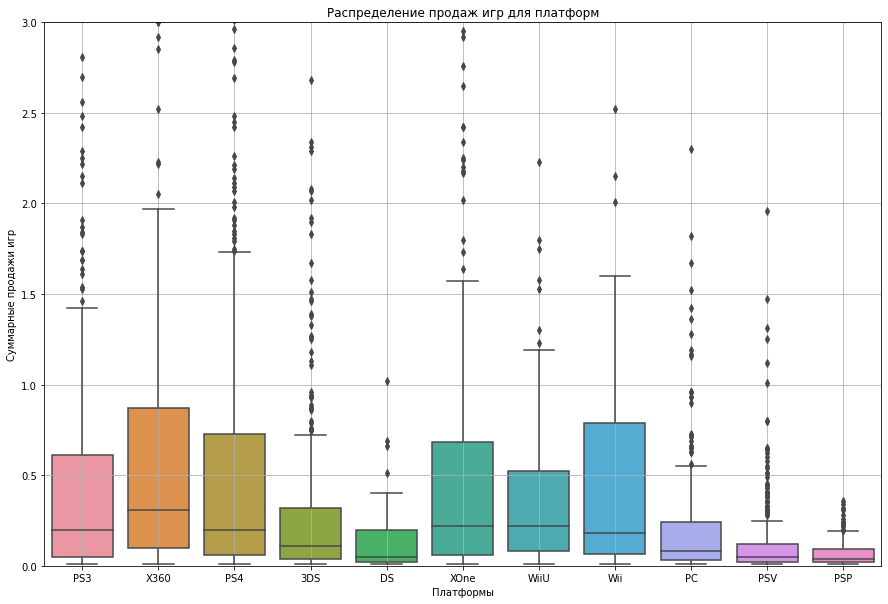

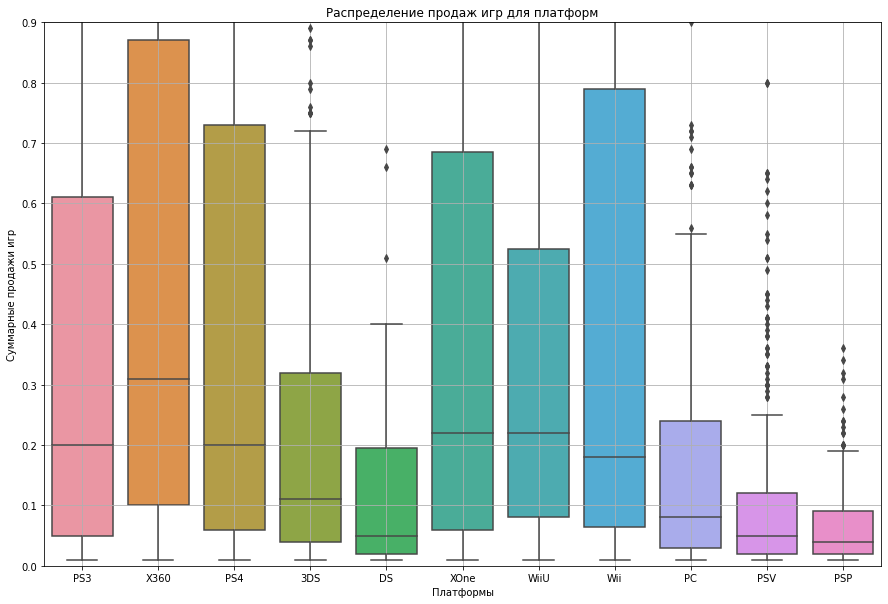

In [183]:
plt.figure(figsize=(15,10))
sb.boxplot(x='platform',y='total_sales',data=actual_data)
plt.ylim(0, 3)
plt.ylabel('Суммарные продажи игр')
plt.xlabel('Платформы')
plt.title('Распределение продаж игр для платформ')
plt.grid()
plt.show()

plt.figure(figsize=(15,10))
sb.boxplot(x='platform',y='total_sales',data=actual_data)
plt.ylim(0, 0.9)
plt.ylabel('Суммарные продажи игр')
plt.xlabel('Платформы')
plt.title('Распределение продаж игр для платформ')
plt.grid()
plt.show()

**По графику можно сказать, что**
1. Больше всего продаются игры для таких платформ, как: X360, PS4, XONE, Wii, PS3, WiiU
2. Медиана у лидеров находится дальше остальных. Разброс больше, так как значений (продаж) больше, средняя/медианная прибыль больше.

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами.
<br> Для этого: 
1. Создадим отдельный датафрейм, хранящий в себе актуальные данные по платформе PS4;
2. Построим диаграмму.

In [184]:
data_ps4 = actual_data[(actual_data['platform'] == 'PS4') & (actual_data['user_score'] > 0) & (actual_data['critic_score'] > 0)]

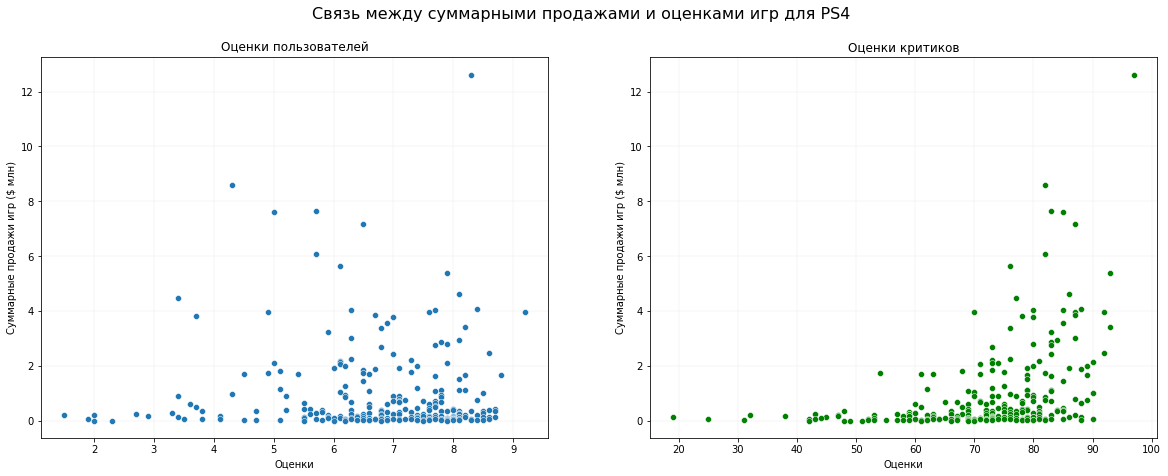

In [185]:
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(20, 7)
)

sb.scatterplot(y="total_sales", x="user_score", data=data_ps4, ax=ax1)
sb.scatterplot(y="total_sales", x="critic_score", data=data_ps4, ax=ax2, color='green')

fig.suptitle('Связь между суммарными продажами и оценками игр для PS4', fontsize=16)

ax1.set_xlabel('Оценки')
ax1.set_ylabel('Суммарные продажи игр ($ млн)')
ax1.grid(linewidth=0.1)
ax1.set_title('Оценки пользователей')

ax2.set_xlabel('Оценки')
ax2.set_ylabel('Суммарные продажи игр ($ млн)')
ax2.grid(linewidth=0.1)
ax2.set_title('Оценки критиков')
plt.show()

In [186]:
print('Корреляция между суммарными продажами и оценками пользователей - {:.2}'.format(data_ps4['total_sales'].corr(data_ps4['user_score'])))
print('Корреляция между суммарными продажами и оценками критиков - {:.2}'.format(data_ps4['total_sales'].corr(data_ps4['critic_score'])))

Корреляция между суммарными продажами и оценками пользователей - -0.034
Корреляция между суммарными продажами и оценками критиков - 0.41


**Исходя из уровней корреляции можно сделать вывод, что оценки критиков демонстрируют прямую, средне-слабую корреляцию с "цифрами" продаж. на PS4, а оценки пользователей корреляции с продажами не имеют. Но на диаграммах рассеяния можем заметить тенденцию для оценок критиков, что при большей оценке, большее количество проданных игр (для оценок пользователей в меньшей степени).**

### Соотнесём выводы с продажами игр на других платформах.

**Платформа XOne**

In [187]:
data_xone = actual_data[(actual_data['platform'] == 'XOne') & (actual_data['user_score'] > 0) & (actual_data['critic_score'] > 0)]

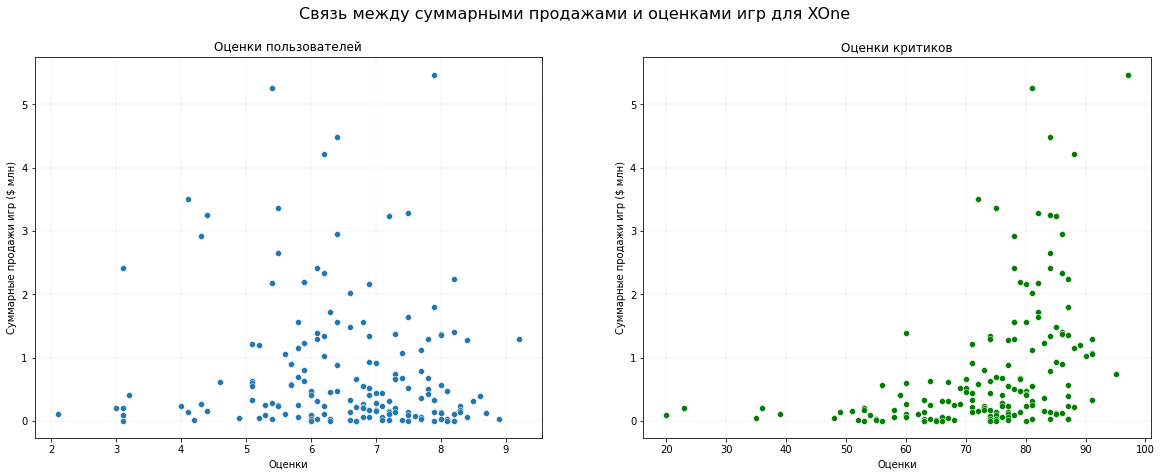

In [188]:
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(20, 7)
)

sb.scatterplot(y="total_sales", x="user_score", data=data_xone, ax=ax1)
sb.scatterplot(y="total_sales", x="critic_score", data=data_xone, ax=ax2, color='green')

fig.suptitle('Связь между суммарными продажами и оценками игр для XOne', fontsize=16)

ax1.set_xlabel('Оценки')
ax1.set_ylabel('Суммарные продажи игр ($ млн)')
ax1.grid(linewidth=0.1)
ax1.set_title('Оценки пользователей')

ax2.set_xlabel('Оценки')
ax2.set_ylabel('Суммарные продажи игр ($ млн)')
ax2.grid(linewidth=0.1)
ax2.set_title('Оценки критиков')
plt.show()

In [189]:
print('Корреляция между суммарными продажами и оценками пользователей - {:.2}'.format(data_xone['total_sales'].corr(data_xone['user_score'])))
print('Корреляция между суммарными продажами и оценками критиков - {:.2}'.format(data_xone['total_sales'].corr(data_xone['critic_score'])))

Корреляция между суммарными продажами и оценками пользователей - -0.094
Корреляция между суммарными продажами и оценками критиков - 0.41


**Платформа X360**

In [190]:
data_x360 = actual_data[(actual_data['platform'] == 'X360') & (actual_data['user_score'] > 0) & (actual_data['critic_score'] > 0)]

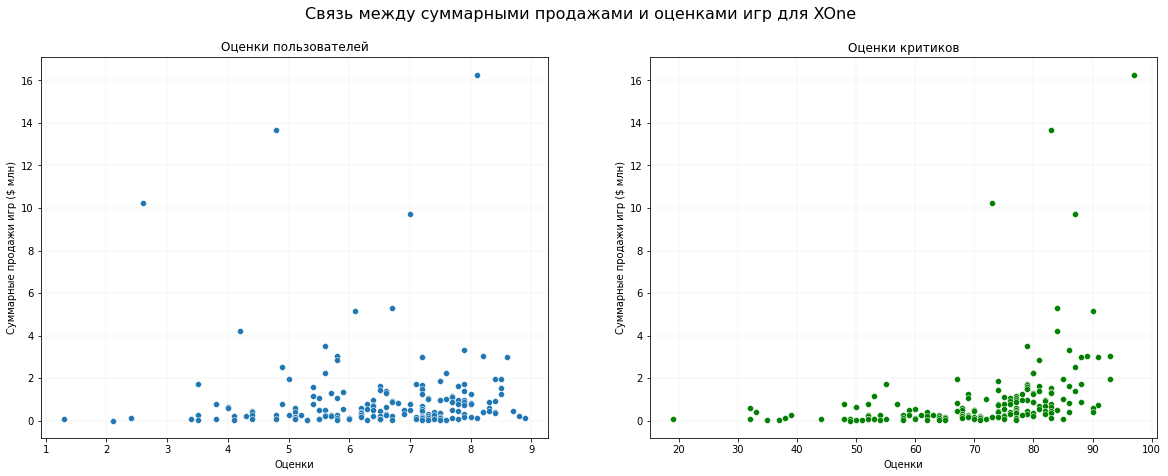

In [191]:
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(20, 7)
)

sb.scatterplot(y="total_sales", x="user_score", data=data_x360, ax=ax1)
sb.scatterplot(y="total_sales", x="critic_score", data=data_x360, ax=ax2, color='green')

fig.suptitle('Связь между суммарными продажами и оценками игр для XOne', fontsize=16)

ax1.set_xlabel('Оценки')
ax1.set_ylabel('Суммарные продажи игр ($ млн)')
ax1.grid(linewidth=0.1)
ax1.set_title('Оценки пользователей')

ax2.set_xlabel('Оценки')
ax2.set_ylabel('Суммарные продажи игр ($ млн)')
ax2.grid(linewidth=0.1)
ax2.set_title('Оценки критиков')
plt.show()

In [192]:
print('Корреляция между суммарными продажами и оценками пользователей - {:.2}'.format(data_x360['total_sales'].corr(data_x360['user_score'])))
print('Корреляция между суммарными продажами и оценками критиков - {:.2}'.format(data_x360['total_sales'].corr(data_x360['critic_score'])))

Корреляция между суммарными продажами и оценками пользователей - -0.0023
Корреляция между суммарными продажами и оценками критиков - 0.36


**Платформа PS3**

In [193]:
data_ps3 = actual_data[(actual_data['platform'] == 'PS3') & (actual_data['user_score'] > 0) & (actual_data['critic_score'] > 0)]

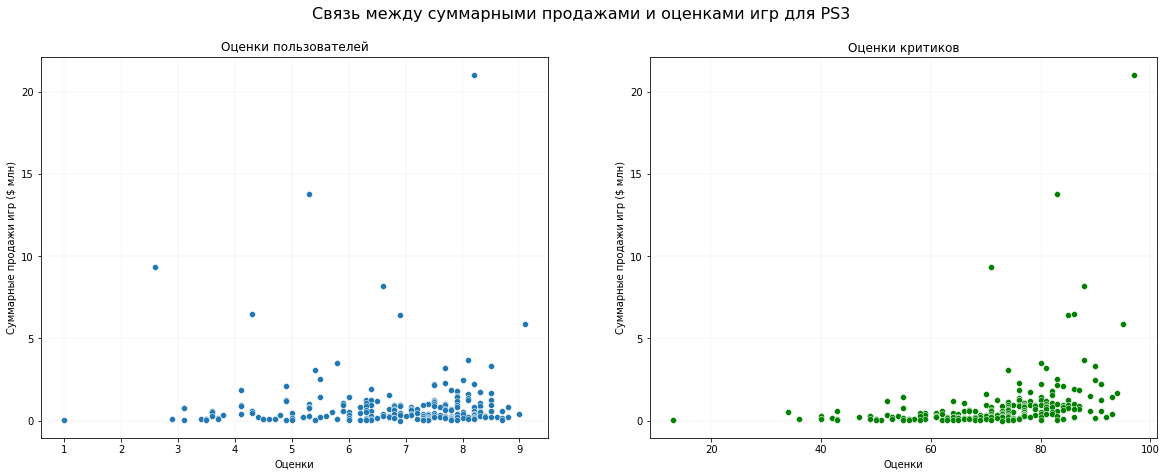

In [194]:
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(20, 7)
)

sb.scatterplot(y="total_sales", x="user_score", data=data_ps3, ax=ax1)
sb.scatterplot(y="total_sales", x="critic_score", data=data_ps3, ax=ax2, color='green')

fig.suptitle('Связь между суммарными продажами и оценками игр для PS3', fontsize=16)

ax1.set_xlabel('Оценки')
ax1.set_ylabel('Суммарные продажи игр ($ млн)')
ax1.grid(linewidth=0.1)
ax1.set_title('Оценки пользователей')

ax2.set_xlabel('Оценки')
ax2.set_ylabel('Суммарные продажи игр ($ млн)')
ax2.grid(linewidth=0.1)
ax2.set_title('Оценки критиков')
plt.show()

In [195]:
print('Корреляция между суммарными продажами и оценками пользователей - {:.2}'.format(data_ps3['total_sales'].corr(data_ps3['user_score'])))
print('Корреляция между суммарными продажами и оценками критиков - {:.2}'.format(data_ps3['total_sales'].corr(data_ps3['critic_score'])))

Корреляция между суммарными продажами и оценками пользователей - 0.0013
Корреляция между суммарными продажами и оценками критиков - 0.33


**Выводы по PS4 можно применить к другим платформам, но суммы продаж для границ будут отличаться в зависимости от средних продаж по платформе. Оценки критиков также демонстрируют прямую, средне-слабую корреляцию с "цифрами" продаж на другие платформы, а оценки пользователей корреляции с продажами не имеют (за исключением приставки "PS3", оценки пользователей демонстрируют очень слабую кореляцию со значениями продаж).**

### Посмотрим на общее распределение игр по жанрам. 

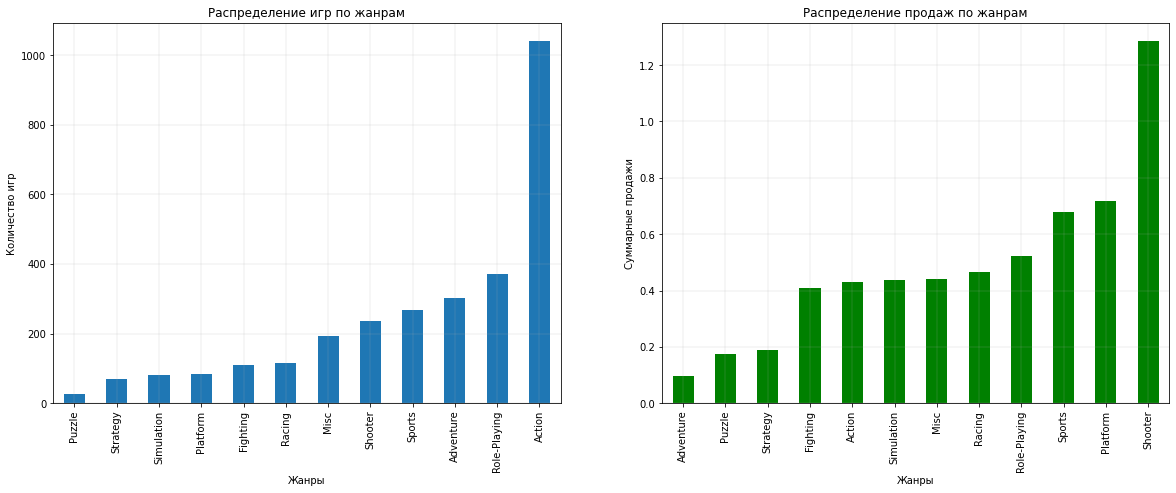

In [196]:
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(20, 7)
)

actual_data.groupby('genre')['name'].count().sort_values().plot.bar(ax=ax1)
actual_data.groupby('genre')['total_sales'].mean().sort_values().plot.bar(ax=ax2, color='green')

ax1.set_xlabel('Жанры')
ax1.set_ylabel('Количество игр')
ax1.grid(linewidth=0.2)
ax1.set_title('Распределение игр по жанрам')

ax2.set_xlabel('Жанры')
ax2.set_ylabel('Суммарные продажи')
ax2.grid(linewidth=0.2)
ax2.set_title('Распределение продаж по жанрам')
plt.show()

### Промежуточный вывод по исследовательскому анализу данных.
<br> **Сколько игр выпускалось в разные годы**
<br> *Рост количества выпускаемых игр идёт с 1994 года по 2008 год. До 1994 года количество игр оставалось на одном уровне. В 2008 году достигается пик по количеству выпускаемых игр. После 2008 года количество игр идёт на спад.*
<br>
<br> **Как менялись продажи по платформам**
<br> *Если смотреть по годам за всё время, то в 2008 году платформа PS2 набрала наибольшее суммарное количество продаж, в то время, как в 2011 году, она уже продала наименьшее количество игр среди остальных платформ.*
<br> *Лидирующими платформами по продажам за всё время являются:  PS2 - лидер по продажам, X360, PS3, Wii, DS, PS.*
<br> *Cредний срок, за который появляются новые и исчезают старые платформы, 11 лет (жизненный цикл платформы).*
<br>
<br> **Актуальный период для составления прогноза на 2017 год**
<br> *Актуальным временным периодом является период с 2012 и 2016 год, т.к. он включает в себя последнее поколение консолей (Sony PlayStation 4, Microsoft Xbox One и Nintendo Wii U) и имеет примерно одинаковые объемы выпущенных игр. Далее все действия будут проводиться для данных за этот период.*
<br>
<br> **Какие платформы лидируют по продажам, растут или падают**
<br> *По продажам лидирует: Sony Playstation 4.*
<br> *Продажи практически всех платформ падают, за исключением Sony PlayStation 4 и Microsoft Xbox One. Для некоторых платформ, жизненный цикл которых уже закончился, продажи игр остановлены.*
<br> *Потенциально прибыльными для 2017 года, будут:*
* PS4 - наблюдается рост продаж (не учитывая 2016 год, данные для которого могут быть не полными
* XONE - наблюдается рост продаж (не учитывая 2016 год, данные для которого могут быть не полными 

**График «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам**
<br> *По графику можно сказать, что*
* Медиана у лидеров находится дальше остальных. Разброс больше, так как значений (продаж) больше, средняя/медианная прибыль больше.
* Выбросы и аномалии находятся за приделами усов

**Как влияют на продажи игр Sony PlayStation 4 отзывы пользователей и критиков**
<br> *Оценки критиков не очень сильно влияют на продажи игр на PS4, а оценки пользователей вообще не влияют. Но на диаграммах рассеяния можем заметить тенденцию для оценок критиков, что при большей оценке, большее количество проданных игр (для оценок пользователей в меньшей степени).*
<br>
<br> **Соотнесём выводы с продажами игр на других платформах**
<br> *Выводы по PS4 можно применить к другим платформам, но суммы продаж для границ будут отличаться в зависимости от средних продаж по платформе.*
<br>
<br> **Посмотрим на общее распределение игр по жанрам.**
* Жанр Shooter - лидер по количеству продаж
* Жанр Action - лидер по количеству игр 
* Жанры Puzzle и Stategy - наименее популярные жанры 
* Жанр Adventure имеют большое количество игр, но по популярности он занимает 3 место с конца.

## Составление портрета пользователя каждого региона

### Определим для пользователя каждого региона (NA, EU, JP):
1. Самые популярные платформы (топ-5);
2. Самые популярные жанры (топ-5);
3. Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Топ-5 популярных платформ для пользователей каждого региона.

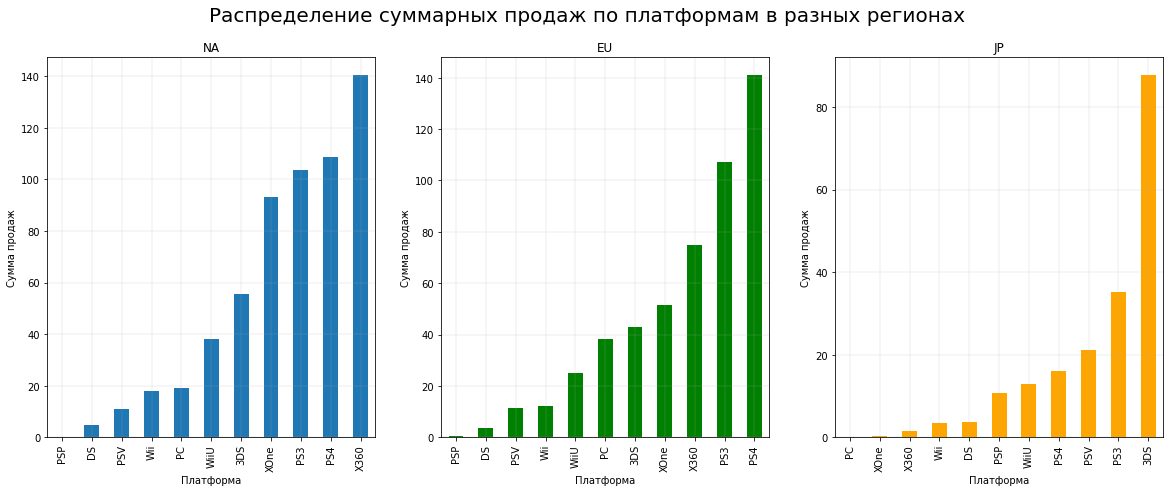

In [197]:
fig, (ax1, ax2, ax3) = plt.subplots(
    nrows=1, ncols=3,
    figsize=(20, 7)
)

actual_data.groupby('platform')['na_sales'].sum().sort_values().plot.bar(ax=ax1)
actual_data.groupby('platform')['eu_sales'].sum().sort_values().plot.bar(ax=ax2, color='green')
actual_data.groupby('platform')['jp_sales'].sum().sort_values().plot.bar(ax=ax3, color='orange')

fig.suptitle('Распределение суммарных продаж по платформам в разных регионах', fontsize=20)

ax1.set_xlabel('Платформа')
ax1.set_ylabel('Сумма продаж')
ax1.grid(linewidth=0.2)
ax1.set_title('NA')

ax2.set_xlabel('Платформа')
ax2.set_ylabel('Сумма продаж')
ax2.grid(linewidth=0.2)
ax2.set_title('EU')

ax3.set_xlabel('Платформа')
ax3.set_ylabel('Сумма продаж')
ax3.grid(linewidth=0.2)
ax3.set_title('JP')
plt.show()

**Создадим три сводные таблицы для того, чтобы показать какую долю от общего числа продаж по миру составляет каждая платформа (из топ-5)**

In [198]:
na_users = actual_data.pivot_table(index='platform', values=['na_sales','total_sales'], aggfunc=('sum'))

na_users = na_users.sort_values(by='na_sales',ascending=False).head()
na_users['Доля продаж']=(na_users['na_sales'] / na_users['total_sales']) * 100
na_users = na_users.reset_index()
na_users = na_users.rename(columns = {'platform' : 'Платформа', 'na_sales' : 'Сумма продаж (NA)', 'total_sales' : 'Сумма продаж (по миру)'})
display(na_users)

,Платформа,Сумма продаж (NA),Сумма продаж (по миру),Доля продаж
0,X360,140.57,237.52,59.182385
1,PS4,108.74,314.14,34.615140
2,PS3,103.74,289.70,35.809458
3,XOne,93.12,159.32,58.448406
4,3DS,55.49,195.01,28.454951


In [199]:
eu_users = actual_data.pivot_table(index='platform', values=['eu_sales','total_sales'], aggfunc=('sum'))

eu_users = eu_users.sort_values(by='eu_sales',ascending=False).head()
eu_users['Доля продаж']=(eu_users['eu_sales'] / eu_users['total_sales']) * 100
eu_users = eu_users.reset_index()
eu_users = eu_users.rename(columns = {'platform' : 'Платформа', 'eu_sales' : 'Сумма продаж (EU)', 'total_sales' : 'Сумма продаж (по миру)'})

display(eu_users)

,Платформа,Сумма продаж (EU),Сумма продаж (по миру),Доля продаж
0,PS4,141.09,314.14,44.913096
1,PS3,107.26,289.70,37.024508
2,X360,74.89,237.52,31.529976
3,XOne,51.59,159.32,32.381371
4,3DS,42.83,195.01,21.962976


In [200]:
jp_users = actual_data.pivot_table(index='platform', values=['jp_sales','total_sales'], aggfunc=('sum'))

jp_users = jp_users.sort_values(by='jp_sales',ascending=False).head()
jp_users['Доля продаж']=(jp_users['jp_sales'] / jp_users['total_sales']) * 100
jp_users = jp_users.reset_index()
jp_users = jp_users.rename(columns = {'platform' : 'Платформа', 'jp_sales' : 'Сумма продаж (EU)', 'total_sales' : 'Сумма продаж (по миру)'})

display(jp_users)

,Платформа,Сумма продаж (EU),Сумма продаж (по миру),Доля продаж
0,3DS,87.79,195.01,45.018204
1,PS3,35.29,289.70,12.181567
2,PSV,21.04,49.18,42.781619
3,PS4,15.96,314.14,5.080537
4,WiiU,13.01,82.19,15.829176


**Для Северной Америки (NA) топ-5 платформ по популярности являются:**
1. X360 - сумма продаж составляет 59.2%;
2. PS4 - сумма продаж составляет 34.6%;
3. PS3 - сумма продаж составляет 35.8%;
4. XOne - сумма продаж составляет 58.4%;
5. 3DS - сумма продаж составляет 28.5%;
**Для Европы (EU) топ-5 платформ по популярности являются:**
1. PS4 - сумма продаж составляет 44.9%;
2. PS3 - сумма продаж составляет 37%;
3. X360 - сумма продаж составляет 31.5%;
4. XOne - сумма продаж составляет 32.4%;
5. 3DS - сумма продаж составляет 22%;
**Для Японии (JP) топ-5 платформ по популярности являются:**
1. 3DS - сумма продаж составляет 45%;
2. PS3 - сумма продаж составляет 12.2%;
3. PSV - сумма продаж составляет 42.78%;
4. PS4 - сумма продаж составляет 5%;
5. WiiU - сумма продаж составляет 15.8%;

**Самой продаваемой платформой в Северной Америке является - X360 (от Американской компании).**
<br>
**Самой продаваемой платформой в Европе является самая актуальная - Play Station 4(почти 45% от общих продаж)**
<br>
**Самой продаваемой платформой в Японии является - 3DS (от Японских производителей).**

### Топ-5 популярных жанров для пользователей каждого региона.

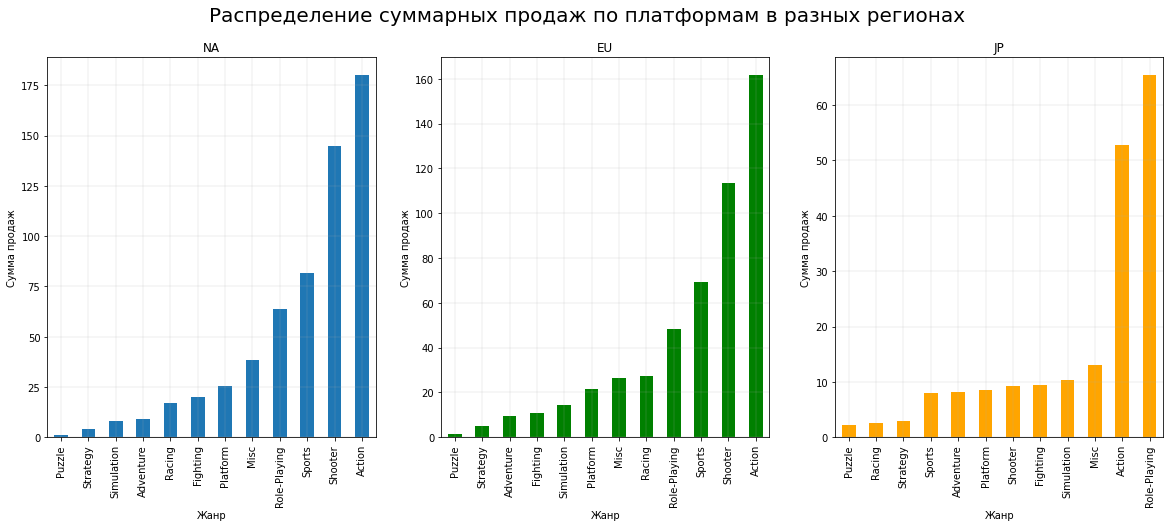

In [201]:
fig, (ax1, ax2, ax3) = plt.subplots(
    nrows=1, ncols=3,
    figsize=(20, 7)
)

actual_data.groupby('genre')['na_sales'].sum().sort_values().plot.bar(ax=ax1)
actual_data.groupby('genre')['eu_sales'].sum().sort_values().plot.bar(ax=ax2, color='green')
actual_data.groupby('genre')['jp_sales'].sum().sort_values().plot.bar(ax=ax3, color='orange')

fig.suptitle('Распределение суммарных продаж по платформам в разных регионах', fontsize=20)

ax1.set_xlabel('Жанр')
ax1.set_ylabel('Сумма продаж')
ax1.grid(linewidth=0.2)
ax1.set_title('NA')

ax2.set_xlabel('Жанр')
ax2.set_ylabel('Сумма продаж')
ax2.grid(linewidth=0.2)
ax2.set_title('EU')

ax3.set_xlabel('Жанр')
ax3.set_ylabel('Сумма продаж')
ax3.grid(linewidth=0.2)
ax3.set_title('JP')
plt.show()

**Для Северной Америки (NA) топ-5 жанров по популярности являются:**
1. Action
2. Shooter
3. Sports
4. Role-Playing
5. Misc 
**Для Европы (EU) топ-5 жанров по популярности являются:**
1. Action
2. Shooter
3. Sports
4. Role-Playing
5. Racing
**Для Японии (JP) топ-5 платформ по популярности являются:**
1. Role-Playing
2. Action
3. Misc
4. Simulation
5. Fighting

**В Северной Америке и в Европе очень популярен жанр 'шутер', в то время как в Японии, он менее популярен. Это связано с тем, что в Японии не приветствуется жестокость и насилие. Поэтому, в Японии преобладает жанр ролевых игр, где японские игры поощряют игроков за коллективную прокачку, и поэтому игровые сессии после работы или учебы становятся способом расслабиться и пообщаться с друзьями, не отрываясь от игры.**
<br> 
**В основном, разница между предпочтением в жанрах обусловлена менталитетом.**

### Узнаем, влияет ли рейтинг ESRB на продажи в отдельном регионе?

* «E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет.
* «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
* «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет.
* «M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет.

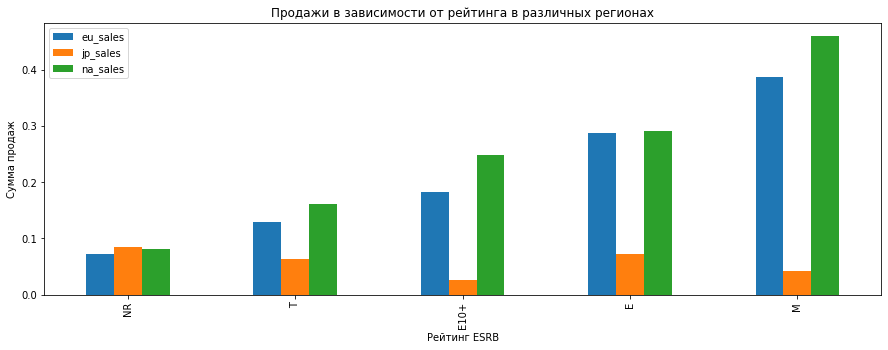

In [202]:
(
  actual_data.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='mean')
  .sort_values(by='na_sales')
  .plot(kind='bar', figsize=(15, 5))
)
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Сумма продаж')
plt.title('Продажи в зависимости от рейтинга в различных регионах')
plt.show()

**Некоторую часть данных составляют игры с рейтингом "NR", то есть неоценённые, на них ориентироваться не будем.**
<br>
<br> Как можем заметить, большую часть проданных игр составляют издания с рейтингом "M", то есть для лиц старше 16 лет. Причём больше всего игры с такой оценкой преобладают в Северной Америке. Далее идут игры с рейтингом "E", то есть для всех людей от 6 лет. Меньшей популярностью пользуются игры с рейтингами "E10+" и "T". Видимо, дети до 10 лет играют в игры с рейтингом "E", а после сразу переступают на игры с рейтингом "M".
<br> Для Японии большее количество игр имеют рейтинг "NR", то есть они не оценены. Это из-за того, что рейтинг ESRB создан для оценивания игр на территории Северной Америки. Видимо в Европе она также пользуется популярностью, но в Японии существует своя рейтинговая система, большая часть игр оценивается именно ею на территории Японии.

### Промежуточный вывод по составлению портрета каждого пользователя.

**Для Северной Америки характерны:**
* Такие платформы, как X360 (59.2% продаж), PS4 (34.6% продаж), PS3 (35.8% продаж), XOne (58.4% продаж), 3DS (28.5% продаж);
* Жанры игр: 'action', 'shooter', 'sports', 'role-playing' и 'misc';
* Игры с рейтингом "M" (для лиц старше 16 лет).

**Для Европы характерны:**
* Такие платформы, как PS4 (44.9% продаж), PS3 (37% продаж), X360 (31.5% продаж), XOne (32.4% продаж), 3DS (22% продаж);
* Жанры игр: 'action', 'shooter', 'sports', 'role-playing' и 'racing';
* Игры с рейтингом "M"

**Для Японии характерны:**
* Такие платформы, как 3DS (45% продаж), PS3 (12.2% продаж), PSV (42.78% продаж), PS4 (5% продаж), WiiU (15.8% продаж);
* Жанры игр: 'action', 'simulation', ' misc', 'role-playing' и 'fighting';
* Игры, не имеющие рейтинговой оценки.

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
* H_0 = "Средние пользовательские рейтинги платформ Xbox One и PC равны" (нулевая гипотеза)
* H_1 = "Средние пользовательские рейтинги платформ Xbox One и PC не равны" (альтернативная гипотеза)

**Уровень критической значимости (a) = 0.05**

**Проверим, отличаются ли выборки дисперсии**

In [203]:
PC_ratings = actual_data.query('(platform == "PC") & (user_score > 0)')['user_score']
XOne_ratings = actual_data.query('(platform == "XOne") & (user_score > 0)')['user_score']

print('Дисперсия XOne =', np.var(XOne_ratings), '| Дисперсия PC =', np.var(PC_ratings)) 

Дисперсия XOne = 1.8965188383045526 | Дисперсия PC = 2.734138496439882


**Дисперсии отличаются между собой, поэтому для параметра equal_var ставим значение False**

In [204]:
alpha = 0.05

results = st.ttest_ind(PC_ratings, XOne_ratings, equal_var=False) 

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не можем отвергнуть нулевую гипотезу")

p-значение: 0.6206366351489678
Не можем отвергнуть нулевую гипотезу


**Вывод по гипотезе: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.**
<br> *Средние пользовательские рейтинги платформ Xbox One и PC равны*

### Средние пользовательские рейтинги жанров Action и Sports разные.
* H_0 = "Средние пользовательские рейтинги жанров Action и Sports равны"
* H_1 = "Средние пользовательские рейтинги жанров Action и Sports не равны"

**Уровень критической значимости (a) = 0.05**

In [205]:
action_scores = actual_data[(actual_data['genre'] == 'Action') & (actual_data['user_score'] > 0)]['user_score']
sports_scores = actual_data[(actual_data['genre'] == 'Sports') & (actual_data['user_score'] > 0)]['user_score']

print('Дисперсия жанра Action =', np.var(action_scores), '| Дисперсия жанра Sports =', np.var(sports_scores)) 

Дисперсия жанра Action = 1.8783732502012689 | Дисперсия жанра Sports = 3.0228802210649377


**Также, дисперсии отличаются между собой, поэтому для параметра equal_var ставим значение False**

In [206]:
alpha = 0.05

results = st.ttest_ind(action_scores, sports_scores, equal_var=False) 

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не можем отвергнуть нулевую гипотезу")

p-значение: 3.3183730691020093e-20
Отвергаем нулевую гипотезу


**Вывод по гипотезе: средние пользовательские рейтинги жанров Action и Sports разные.**
<br> *Средние пользовательские рейтинги жанров Action и Sports не равны*

## Общий вывод
**Данный проект состоит из 5 этапов.**

1. **Загрузка данных**. На этом этапе был открыт файл и была изучена вся основная информация по этому файлу. Также, на этом этапе было выяснено, что в датафрейме
    * имеются пропуски
    * названия столбцов имеют верхний регистр 
    * возможно присутствуют дубликаты 
    * в некоторых столбцах нужно поменять тип данных.
2. **Предобработка данных**. На данном этапе были исправлены ошибки, указанные в 1 этапе разработки проекта. Также, был добавлен новый столбец, хранящий в себе информацию о суммарных продажах во всех регионах (столбец 'total_sum').
3. **Исследовательский анализ данных**.
    * Рост количества выпускаемых игр идёт с 1994 года по 2008 год. До 1994 года количество игр оставалось на одном уровне. В 2008 году достигается пик по количеству выпускаемых игр. После 2008 года количество игр идёт на спад.
    * Если смотреть по годам за всё время, то в 2008 году платформа PS2 набрала наибольшее суммарное количество продаж, в то время, как в 2011 году, она уже продала наименьшее количество игр среди остальных платформ. Лидирующими платформами по продажам за всё время являются:  PS2 - лидер по продажам, X360, PS3, Wii, DS, PS.
    * Cредний срок, за который появляются новые и исчезают старые платформы, 11 лет (жизненный цикл платформы).
    * Актуальным временным периодом является период с 2012 по 2016 гг.
    * Потенциально прибыльными для 2017 года, будут:
        * PS4 - наблюдается рост продаж (не учитывая 2016 год, данные для которого могут быть не полными
        * XONE - наблюдается рост продаж (не учитывая 2016 год, данные для которого могут быть не полными 
    * Оценки критиков демонстрируют прямую, средне-слабую корреляцию с "цифрами" продаж на другие платформы, а оценки пользователей корреляции с продажами не имеют. Но на диаграммах рассеяния можем заметить тенденцию для оценок критиков, что при большей оценке, большее количество проданных игр (для оценок пользователей в меньшей степени).
    * Выводы по PS4 можно применить к другим платформам, но суммы продаж для границ будут отличаться в зависимости от средних продаж по платформе.
    * Жанр Action - лидер по количеству игр, а также по количеству продаж. Жанры Puzzle и Stategy - наименее популярные жанры
4. **Составление портрета пользователя каждого региона**.
* **Для Северной Америки характерны:**
    * Такие платформы, как X360 (59.2% продаж), PS4 (34.6% продаж), PS3 (35.8% продаж), XOne (58.4% продаж), 3DS (28.5% продаж);
    * Жанры игр: 'action', 'shooter', 'sports', 'role-playing' и 'misc';
    * Игры с рейтингом "M" (для лиц старше 16 лет).

* **Для Европы характерны:**
    * Такие платформы, как PS4 (44.9% продаж), PS3 (37% продаж), X360 (31.5% продаж), XOne (32.4% продаж), 3DS (22% продаж);
    * Жанры игр: 'action', 'shooter', 'sports', 'role-playing' и 'racing';
    * Игры с рейтингом "M"

* **Для Японии характерны:**
    * Такие платформы, как 3DS (45% продаж), PS3 (12.2% продаж), PSV (42.78% продаж), PS4 (5% продаж), WiiU (15.8% продаж);
    * Жанры игр: 'action', 'simulation', ' misc', 'role-playing' и 'fighting';
    * Игры, не имеющие рейтинговой оценки.
* ESRB рейтинг влияет на продажи, но не в Японии. В Японии своя система оценивания игр и большая часть игр оценивается именно ею, поэтому в данном проекте для игр в Японии стоит рейтингц "NR" ("Not Rated"). Для игр в Северной Америке и Европе большинство проданных игр - игры с рейтингом "M" (для лиц старше 16 лет). Менее популярны же игры с рейтингом "T" (для лиц старше 13 лет).
5. **Проверка гипотез**
    * *Средние пользовательские рейтинги платформ Xbox One и PC равны*
    * *Средние пользовательские рейтинги жанров Action и Sports не равны*

**Планировка рекламной компании на 2017 год.**
<br>*Для того, чтобы максимально прибыльно акцентировать на какие игры тратить рекламный бюджет, у нас есть несколько факторов:*
1. **Платформа.** Наиболее актуальными платформами на 2017 год будут PS4 и XOne. Их продажи с каждом годом лишь увеличиваются, а их жизненный цикл только подходит к середине (5 лет), так что именно они на 2017 год будут наиболее актуальными и прибыльными.
2. **Жанр.** Для пользователей больше всего привлекателен жанр игр 'Шутер'. Его суммарные продажи гораздо больше, чем у других жанров.
3. **Рейтинг ESRB.** Большинство людей предпочитают игры с рейтингом "M", то есть для лиц старше 17 лет. 
4. **Регион.** Хорошим вариантом для рекламы будет Северная Америка. Там продаётся большее количество игр и все условия, описанные выше, подходят для покупателей, проживающих именно на этой территории.
5. **Обращать внимание на оценки критиков или на оценки игроков смысла почти не имеет, так как оценки критиков демонстрируют прямую, средне-слабую корреляцию с "цифрами" продаж на другие платформы, а оценки пользователей корреляции с продажами не имеют.**